# This script 
=> loads preprocessed training data 

=> splits it into training and validation sets 

=> compiles UNet++ model using the Adam optimizer with a binary cross-entropy loss function 

=> trains each model for a specified number of epochs 

=> ModelCheckpoint callbacks are used to save the best-performing models based on validation accuracy during training

In [24]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.models import load_model
import matplotlib.pyplot as plt

# Load preprocessed data

In [18]:
X_train = np.load(r'path\X_train.npy')
y_train = np.load(r'path\y_train.npy')
X_val = np.load(r'path\X_val.npy')
y_val = np.load(r'path\y_val.npy')
X_test = np.load(r'path\X_test.npy')
y_test = np.load(r'path\y_test.npy')

# Load or define the UNet++ model

In [19]:
# Define model
input_shape = X_train.shape[1:]
num_classes = 2
model = load_model(r'path_to\unet_plusplus.keras')

# Compile the model

In [20]:
# Compile model
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model

In [21]:
# Train model
history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.4748 - loss: 0.6794 - val_accuracy: 0.4078 - val_loss: 0.7135
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.5303 - loss: 0.6396 - val_accuracy: 0.5830 - val_loss: 0.6613
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7484 - loss: 0.6110 - val_accuracy: 0.6638 - val_loss: 0.6441
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7655 - loss: 0.5437 - val_accuracy: 0.7770 - val_loss: 0.5474
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.8258 - loss: 0.4632 - val_accuracy: 0.8070 - val_loss: 0.4768
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.8481 - loss: 0.3986 - val_accuracy: 0.8041 - val_loss: 0.4725
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8409 - loss: 0.3970 - val_accuracy: 0.8038 - val_loss: 0.4515
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.8417 - loss: 0.3845 - val_accuracy: 0.8032 - val_loss: 0.4472
Epoch 9/

# Save the trained model

In [22]:
model.save('Unetpp_trained_model.keras')

# Get training and validation loss from the history object

In [23]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss

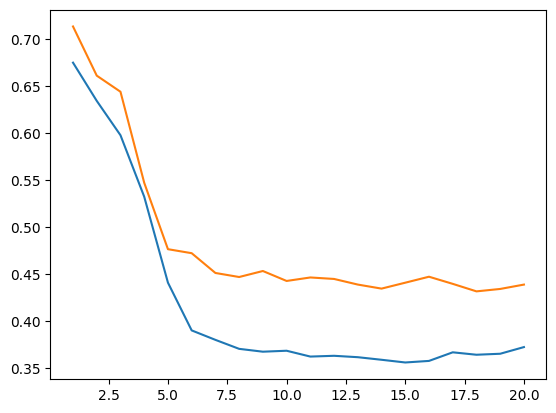

In [25]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')